### **Business Analytics & A/B Testing Project**

### Task 1: Data Import and Preparation
1.  **Load the Data:** Import the necessary Python libraries (pandas is essential). Then read the CSV file into a DataFrame

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt


# Load the dataframe.
df = pd.read_csv('D:/04_Data Analytics/Datasets/business_analytics_data.csv')

# Display the first 5 rows.
display(df.head())

,OrderID,CustomerID,OrderDate,ProductCategory,SalesAmount,Cost,Profit,group,converted
0,ORD1000,CUST138,2023-01-01,Groceries,4242,2261.65,1980.35,experiment,False
1,ORD1001,CUST128,2023-01-02,Electronics,4464,3175.46,1288.54,experiment,False
2,ORD1002,CUST114,2023-01-03,Books,4565,3079.25,1485.75,experiment,True
3,ORD1003,CUST142,2023-01-04,Electronics,735,603.32,131.68,control,False
4,ORD1004,CUST107,2023-01-05,Electronics,1793,1597.85,195.15,experiment,False


2. **Understand the Features**: Examine the columns in the dataset using df.columns and try to understand what each represents.



In [8]:
# use df.columns and try to understand what each column represents.
df.columns

Index(['OrderID', 'CustomerID', 'OrderDate', 'ProductCategory', 'SalesAmount',
       'Cost', 'Profit', 'group', 'converted'],
      dtype='object')

3. **Basic Data Audit:** Check for missing values and duplicates:

In [9]:
# Use df.info() to see data types and non-null counts.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          200 non-null    object 
 1   CustomerID       200 non-null    object 
 2   OrderDate        200 non-null    object 
 3   ProductCategory  200 non-null    object 
 4   SalesAmount      200 non-null    int64  
 5   Cost             200 non-null    float64
 6   Profit           200 non-null    float64
 7   group            200 non-null    object 
 8   converted        200 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 12.8+ KB


In [10]:
# Use df.isna().sum() to see how many missing entries per column.
# If there are missing values, consider how to handle them.

df.isna().sum()

OrderID            0
CustomerID         0
OrderDate          0
ProductCategory    0
SalesAmount        0
Cost               0
Profit             0
group              0
converted          0
dtype: int64

output indicates that there are no missing values in any of the columns.

In [11]:
# Check for duplicate records using df.duplicated().sum().
#If duplicates exist, remove them with df.drop_duplicates().

df.duplicated().sum()

np.int64(0)

The output of df.duplicated().sum() shows the number of duplicate rows in the DataFrame. In this case, the output of np.int64(0) indicates that there are no duplicate rows in the dataset.

4. **Data Type Conversion:** Ensure that date columns are in proper datetime format(use pandas.to_datetime on the date column if present). Also, confirm numericfields (Sales, Cost, Profit, etc.) are numeric (int/float). Convert types if necessary for analysis.



In [12]:
# Convert 'OrderDate' to datetime format
# Confirm numeric fields (SalesAmount, Cost, Profit, etc.) are numeric (int/float).
# df.info() can be used to check data types
# Convert types if necessary for analysis (though they appear to be correct based on df.info() output).

# Convert to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

# Format the date as 'DD-MM-YYYY' and store in a new column
df['OrderDate_formatted'] = df['OrderDate'].dt.strftime('%d-%m-%Y')

df

,OrderID,CustomerID,OrderDate,ProductCategory,SalesAmount,Cost,Profit,group,converted,OrderDate_formatted
0,ORD1000,CUST138,2023-01-01,Groceries,4242,2261.65,1980.35,experiment,False,01-01-2023
1,ORD1001,CUST128,2023-01-02,Electronics,4464,3175.46,1288.54,experiment,False,02-01-2023
2,ORD1002,CUST114,2023-01-03,Books,4565,3079.25,1485.75,experiment,True,03-01-2023
3,ORD1003,CUST142,2023-01-04,Electronics,735,603.32,131.68,control,False,04-01-2023
4,ORD1004,CUST107,2023-01-05,Electronics,1793,1597.85,195.15,experiment,False,05-01-2023
...,...,...,...,...,...,...,...,...,...,...
195,ORD1195,CUST136,2023-07-15,Books,4385,2771.93,1613.07,experiment,False,15-07-2023
196,ORD1196,CUST132,2023-07-16,Toys,604,527.58,76.42,experiment,True,16-07-2023
197,ORD1197,CUST141,2023-07-17,Books,1314,660.96,653.04,experiment,False,17-07-2023
198,ORD1198,CUST143,2023-07-18,Toys,1631,962.51,668.49,experiment,False,18-07-2023


5. **Calculate Additional Fields:** Add some useful calculated columns:



In [13]:
# Add a new column called Total_Sales to the df and Calculate Total Sales for each order line.

#df['Total_Sales'] = df['SalesAmount'] * df['Cost']
df.head()

,OrderID,CustomerID,OrderDate,ProductCategory,SalesAmount,Cost,Profit,group,converted,OrderDate_formatted
0,ORD1000,CUST138,2023-01-01,Groceries,4242,2261.65,1980.35,experiment,False,01-01-2023
1,ORD1001,CUST128,2023-01-02,Electronics,4464,3175.46,1288.54,experiment,False,02-01-2023
2,ORD1002,CUST114,2023-01-03,Books,4565,3079.25,1485.75,experiment,True,03-01-2023
3,ORD1003,CUST142,2023-01-04,Electronics,735,603.32,131.68,control,False,04-01-2023
4,ORD1004,CUST107,2023-01-05,Electronics,1793,1597.85,195.15,experiment,False,05-01-2023


In [14]:
# Ensure there is a Profit column. If the dataset provides a profit for each record, great.
# If it provides cost and sales, you can compute profit = sales – cost.

Data set already has a Profit column

(Optional) If you plan to analyze time-based trends, extract Year or Month
from the order date into new columns (e.g., df['OrderMonth'] =
df['OrderDate'].dt.to_period('M')).

In [15]:
# To analyze time-based trends, extract Year or Month from the order date into new columns (e.g. df['OrderMonth'] = df['OrderDate'].dt.to_period('M')).

df['OrderMonth'] = df['OrderDate'].dt.to_period('M')
df.head()

,OrderID,CustomerID,OrderDate,ProductCategory,SalesAmount,Cost,Profit,group,converted,OrderDate_formatted,OrderMonth
0,ORD1000,CUST138,2023-01-01,Groceries,4242,2261.65,1980.35,experiment,False,01-01-2023,2023-01
1,ORD1001,CUST128,2023-01-02,Electronics,4464,3175.46,1288.54,experiment,False,02-01-2023,2023-01
2,ORD1002,CUST114,2023-01-03,Books,4565,3079.25,1485.75,experiment,True,03-01-2023,2023-01
3,ORD1003,CUST142,2023-01-04,Electronics,735,603.32,131.68,control,False,04-01-2023,2023-01
4,ORD1004,CUST107,2023-01-05,Electronics,1793,1597.85,195.15,experiment,False,05-01-2023,2023-01


In [16]:
# extract Year from OrderDate and add to a new column

df['OrderYear'] = df['OrderDate'].dt.year
df.head()

,OrderID,CustomerID,OrderDate,ProductCategory,SalesAmount,Cost,Profit,group,converted,OrderDate_formatted,OrderMonth,OrderYear
0,ORD1000,CUST138,2023-01-01,Groceries,4242,2261.65,1980.35,experiment,False,01-01-2023,2023-01,2023
1,ORD1001,CUST128,2023-01-02,Electronics,4464,3175.46,1288.54,experiment,False,02-01-2023,2023-01,2023
2,ORD1002,CUST114,2023-01-03,Books,4565,3079.25,1485.75,experiment,True,03-01-2023,2023-01,2023
3,ORD1003,CUST142,2023-01-04,Electronics,735,603.32,131.68,control,False,04-01-2023,2023-01,2023
4,ORD1004,CUST107,2023-01-05,Electronics,1793,1597.85,195.15,experiment,False,05-01-2023,2023-01,2023


### Reflection and Summary

#### Performed data cleaning (handling missing values and duplicates) and feature engineering (e.g., created new time and financial features).

**Critical steps in the data cleaning and preparation:**

* **Data Loading:** The process started by loading necessary libraries and also loading the data from the CSV file into a pandas DataFrame.

* **Understanding Features:** Examined the column names to understand the data types and structure.

* **Basic Data Audit:** Checked for missing values using df.isna().sum() and confirmed there were none. Also checked for duplicate rows using df.duplicated().sum() and found no duplicates. These are critical steps to ensure data quality.

* **Data Type Conversion:** The 'OrderDate' column, which was initially an object type (string), was converted to a datetime format using pd.to_datetime. This is crucial for any time-based analysis. A new column OrderDate_formatted was created to store the date in a specific 'DD-MM-YYYY' string format.

* **Additional Field Calculation** (Feature Engineering): Extracted the month and year from the 'OrderDate' column and added them as new columns ('OrderMonth' and 'OrderYear'). This allows for analysis of trends over time. The 'Profit' column was already present and did not need to be calculated from Sales and Cost.

**Summary of issues found:**
* An AttributeError was encountered when trying to use the .dt accessor on the 'OrderDate' column before it was converted to a datetime format. This was fixed by using pd.to_datetime(df['OrderDate'], errors='coerce') to ensure the column had the correct data type.

## Task 2: Exploratory Data Analysis (EDA)

**2.1. – Descriptive Statistics:**
- Start by getting summary statistics of numerical columns.
Use df.describe() to see distributions of sales, profit, etc. Note the mean, min, max, and quartiles. This gives a sense of typical order values and profit margins.

In [17]:
df.describe()

,OrderDate,SalesAmount,Cost,Profit,OrderYear
count,200,200.000000,200.000000,200.000000,200.0
mean,2023-04-10 12:00:00,2582.725000,1767.423750,815.301250,2023.0
min,2023-01-01 00:00:00,214.000000,113.300000,39.830000,2023.0
25%,2023-02-19 18:00:00,1403.750000,959.885000,354.527500,2023.0
50%,2023-04-10 12:00:00,2642.500000,1750.110000,707.645000,2023.0
75%,2023-05-30 06:00:00,3653.750000,2483.977500,1231.372500,2023.0
max,2023-07-19 00:00:00,4949.000000,4037.250000,2286.110000,2023.0
std,NaN,1339.648105,934.804316,547.829368,0.0


**2.2 – Sales Performance Overview:**  Answer the following questions like:
- What is the total revenue (total sales) in the dataset?

In [18]:
# What is the total revenue (total sales) in the dataset?

total_revenue = df['SalesAmount'].sum()
print(f"Total Revenue: {total_revenue}")

Total Revenue: 516545


- What is the total profit?

In [19]:
# What is the total profit?

total_profit = df['Profit'].sum()
print(f"Total Profit: {total_profit}")

Total Profit: 163060.25


-  How many total orders are recorded? – This could be the number of unique Order IDs or simply the number of rows if each row is an order line.

In [20]:
# How many total orders are recorded?
# This could be the number of unique Order IDs or simply the number of rows if each row is an order line.

total_orders = df['OrderID'].nunique()
print(f"Total Orders: {total_orders}")

Total Orders: 200


- How many unique customers made purchases? – Use df['CustomerID'].nunique().

In [21]:
#How many unique customers made purchases? – Use df['CustomerID'].nunique().

unique_customers = df['CustomerID'].nunique()
print(f"Unique Customers: {unique_customers}")

Unique Customers: 49


**2.3 – Time Series Trends:** Use date data is available:

- Find the number of orders per month. You can group by month and count orders, or use resampling if using a DateTime index. This will show seasonality or growth over time.

In [22]:
# Find the number of orders per month. You can group by month and count orders, or use resampling if using a DateTime index.

orders_per_month = df.groupby(df['OrderMonth']).size()
print(orders_per_month)

OrderMonth
2023-01    31
2023-02    28
2023-03    31
2023-04    30
2023-05    31
2023-06    30
2023-07    19
Freq: M, dtype: int64


- Find the total sales per month. Group the data by month (df.groupby('OrderMonth')['Sales'].sum()) to see which months had higher
sales. Are there any peak periods (e.g., holiday season spikes)?

In [23]:
#Find the total sales per month. Group the data by month (df.groupby('OrderMonth')['Sales'].sum()) to see which months had higher sales.
# Are there any peak periods (e.g., holiday season spikes)?

sales_per_month = df.groupby(df['OrderMonth'])['SalesAmount'].sum()
print(sales_per_month)

OrderMonth
2023-01    74818
2023-02    81027
2023-03    86339
2023-04    74620
2023-05    78894
2023-06    70660
2023-07    50187
Freq: M, Name: SalesAmount, dtype: int64


Create a simple line plot of sales over time (month by month) to visualize trends (using matplotlib or seaborn).

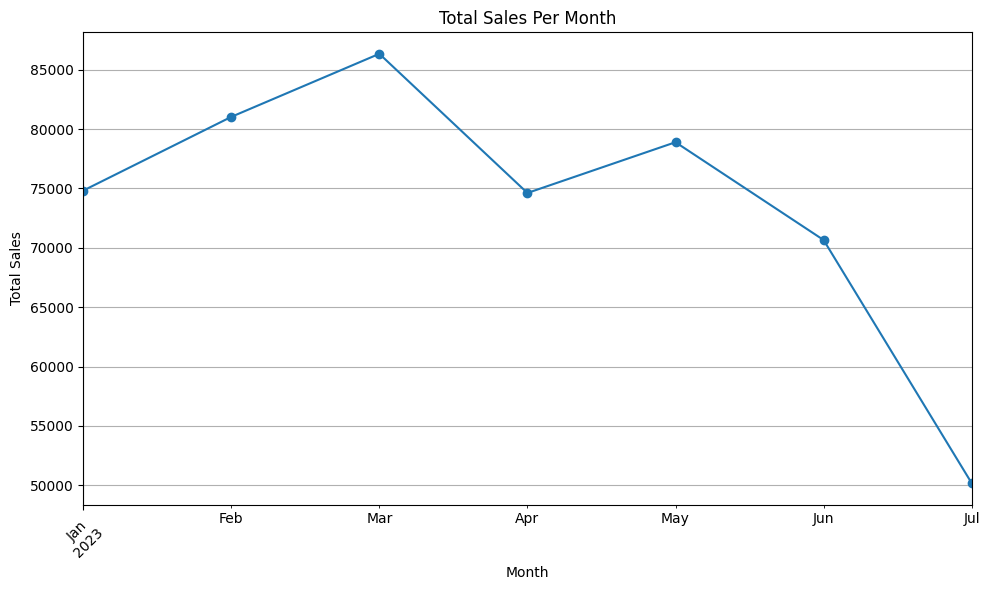

In [24]:
# #create a simple line plot of sales over time (month by month) to visualize trends (using matplotlib).
plt.figure(figsize=(10, 6))
sales_per_month.plot(kind='line', marker='o')
plt.title('Total Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2.4 – Category or Product Analysis:**
Examine which products or categories are performing best:

- Top 5 product categories by sales: If a column like ProductCategory exists, group by it and sum the sales. List the top 5 categories with highest total sales.

In [25]:
# Top 5 product categories by sales: Group by ProductCategory and sum the sales

top_5_categories = df.groupby('ProductCategory')['SalesAmount'].sum().sort_values(ascending=False).head(5)
print("Top 5 Product Categories by Sales:")
print(top_5_categories)

Top 5 Product Categories by Sales:
ProductCategory
Books          131636
Electronics    120672
Clothing        97032
Groceries       94238
Toys            72967
Name: SalesAmount, dtype: int64


- Top 5 products by number of orders: If individual product IDs or names are available, find which products were ordered most frequently.

In [26]:
# Find Top 5 product categories by number of orders: Count the occurrences of each ProductCategory

top_5_categories_by_orders = df['ProductCategory'].value_counts().head(5)
print("Top 5 Product Categories by Number of Orders:")
print(top_5_categories_by_orders)

Top 5 Product Categories by Number of Orders:
ProductCategory
Electronics    49
Books          46
Groceries      41
Clothing       35
Toys           29
Name: count, dtype: int64


- Which category has the highest profit margin overall? (You can compute category-level profit margin by dividing total profit by total sales per category, more on profit margin in Task 3.)

In [27]:
# Which category has the highest profit margin overall?

# Calculate total profit and total sales per category
category_profit_sales = df.groupby('ProductCategory').agg({
    'Profit': 'sum',
    'SalesAmount': 'sum'
})

# Calculate profit margin for each category
category_profit_sales['Profit_Margin'] = (category_profit_sales['Profit'] / category_profit_sales['SalesAmount']) * 100

# Find the category with the highest profit margin
highest_profit_margin_category = category_profit_sales['Profit_Margin'].idxmax()
highest_profit_margin_value = category_profit_sales['Profit_Margin'].max()

print(f"Category with the highest profit margin: {highest_profit_margin_category}")
print(f"Highest profit margin: {highest_profit_margin_value:.2f}%")

Category with the highest profit margin: Toys
Highest profit margin: 32.78%


**2.5 – Customer Behavior:** Investigate customer patterns:

- Average order value (AOV): Calculate total_sales / number_of_orders to see
how much, on average, each order is worth.

In [28]:
# Average order value (AOV): Calculate total_sales / number_of_orders.

total_sales = df['SalesAmount'].sum()
number_of_orders = df['OrderID'].nunique()

average_order_value = total_sales / number_of_orders
print(f"Average Order Value (AOV): {average_order_value:.2f}")

Average Order Value (AOV): 2582.72


- Purchases per customer: Calculate the distribution of the number of orders per customer (e.g., use df['CustomerID'].value_counts() to see how many orders each customer made). Churn analysis shows whether most customers buy once or repeatedly.

In [29]:
# Purchases per customer: Calculate the distribution of the number of orders per customer (e.g., use df['CustomerID'].value_counts() to see how many orders each customer made).

orders_per_customer = df['CustomerID'].value_counts()
print("Purchases per Customer:")
print(orders_per_customer)

Purchases per Customer:
CustomerID
CUST143    10
CUST138     9
CUST123     8
CUST114     7
CUST107     7
CUST127     7
CUST113     6
CUST141     6
CUST108     6
CUST134     6
CUST146     5
CUST126     5
CUST132     5
CUST101     5
CUST125     5
CUST136     5
CUST106     5
CUST144     5
CUST100     5
CUST124     5
CUST110     4
CUST120     4
CUST128     4
CUST139     4
CUST102     4
CUST135     4
CUST122     4
CUST103     4
CUST121     4
CUST140     3
CUST112     3
CUST129     3
CUST117     3
CUST105     3
CUST131     3
CUST104     2
CUST142     2
CUST149     2
CUST115     2
CUST148     2
CUST111     2
CUST147     2
CUST133     2
CUST116     2
CUST119     2
CUST118     1
CUST137     1
CUST109     1
CUST130     1
Name: count, dtype: int64


**2.6 – Visualizations** (Optional but Encouraged): Create at least one or two simple charts:

In [30]:
# Bar chart of sales by top categories using Seaborn
# top_categories = df.groupby('ProductCategory')['SalesAmount'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
# Assign x to hue and set legend=False as suggested by the future warning
sns.barplot(x=top_categories.index, y=top_categories.values, hue=top_categories.index, palette='viridis', legend=False)
plt.title('Top 5 Categories by Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'top_categories' is not defined

<Figure size 1000x600 with 0 Axes>

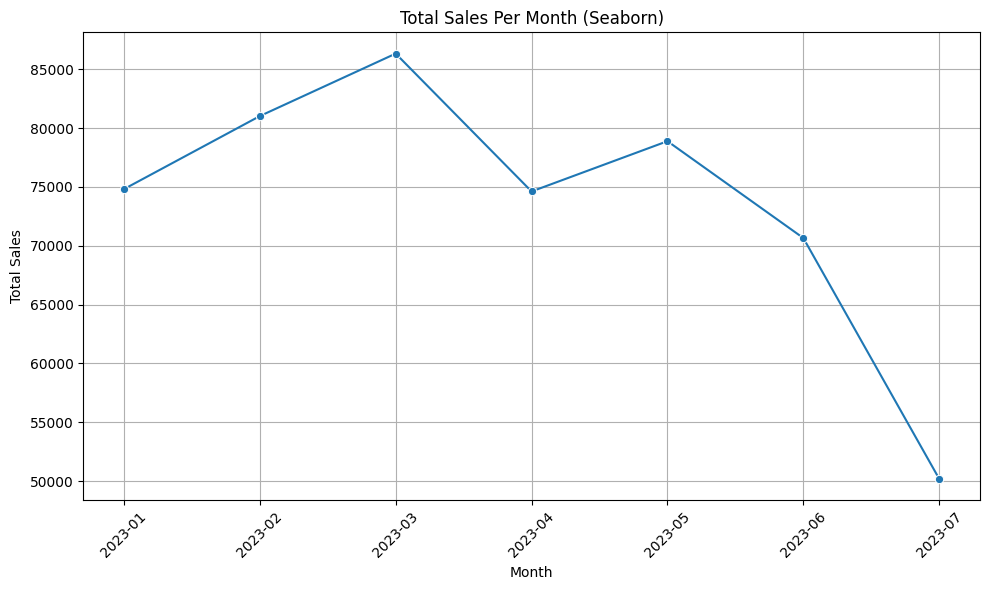

In [ ]:
# Create a Line chart of monthly sales trend using Seaborn
# Convert the index (OrderMonth) to a column for Seaborn plotting and convert to string

sales_per_month_df = sales_per_month.reset_index()
sales_per_month_df.columns = ['OrderMonth', 'Total Sales']
sales_per_month_df['OrderMonth'] = sales_per_month_df['OrderMonth'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_per_month_df, x='OrderMonth', y='Total Sales', marker='o')
plt.title('Total Sales Per Month (Seaborn)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Insights on the Line Plot**
- Based on the line plot of total sales per month (generated from the sales_per_month data), the following can be observed

**Overall Trend:**
- The total sales per month show fluctuations over the period from January to July 2023. There isn't a clear, consistent upward or downward trend across these months.

**Peak Sales:**
- March had the highest total sales (86339), suggesting it was the peak month for sales during this period.

**Lower Sales:**
- July shows a noticeable dip in sales (50187), which is the lowest point in the plotted period. June also saw a dip compared to the preceding months.

**Early Months:**
- Sales in the early months (January, February, April, May) were relatively stable, fluctuating around the 70,000 to 80,000 range before the dips in June and July.

**Explanations:**
The fluctuations suggest that sales are not linearly increasing or decreasing but are influenced by other factors that vary month to month.
The peak in March could potentially be due to seasonal factors, marketing campaigns, or specific events during that month.
The decrease in sales in June and July could also be seasonal (e.g., summer slowdowns in certain industries), or it might indicate other factors affecting sales during that period.

It would be prudent to understand the reasons behind these fluctuations. Further investigation of other factors like marketing spend, promotional activities, external events, or product launches during these months, is imperative and should be done if such data were available.

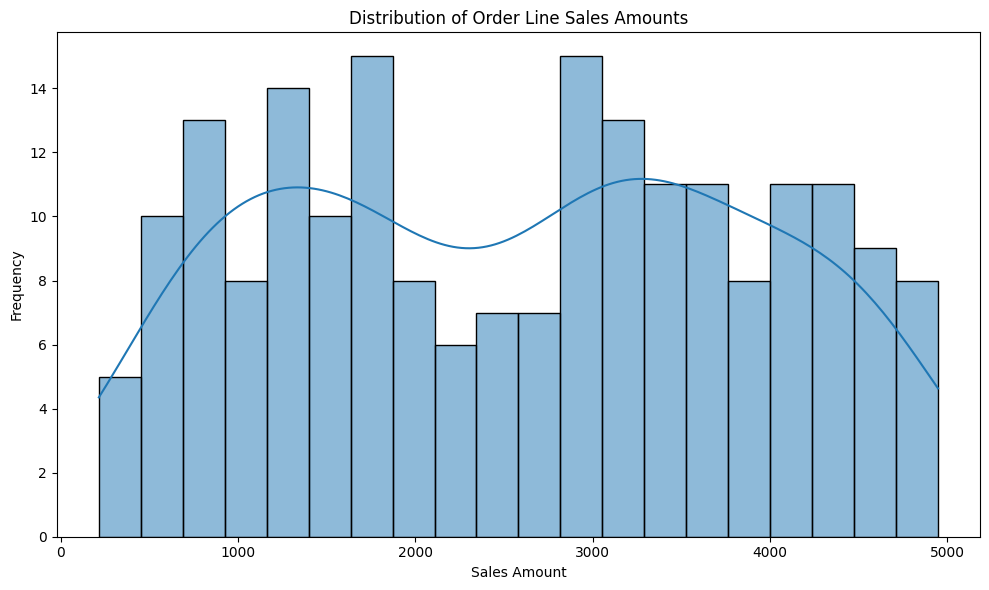

In [ ]:
# Histogram of order values or number of items per order.

# Create a histogram of SalesAmount using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SalesAmount', bins=20, kde=True)
plt.title('Distribution of Order Line Sales Amounts')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### **Insights:**

**Distribution Shape:**
- The histogram shows a right-skewed distribution. This means that the majority of order line sales amounts are concentrated at the lower end of the range, while there are fewer instances of higher sales amounts.
**Typical Order Value:**
- The peak of the histogram is towards the left, indicating that the most frequent order line sales amounts fall within a lower range.

**Presence of Higher Value Orders:**
- While less frequent, there are still order lines with significantly higher sales amounts, represented by the bars extending towards the right side of the histogram.

**Explanations:**
The right-skewed distribution is common in sales data, where many small transactions occur alongside a smaller number of larger transactions.
This distribution suggests that a significant portion of the revenue might be driven by a smaller number of high-value order lines, even though the majority of orders are of lower value.

**Recommendation:**
A significant portion of revenue is driven by a smaller high-value order lines, marketing strategies targeting high-value customers may be implemented through marketing campaigns and sales forecasting.


### Exercise 2: Key Business Metric Analysis & A/B Testing Exercise (10 Marks)

#### **Task 1: Key Business Metric Analysis**
- In this task, you will calculate specific business metrics that are crucial in e-commerce: conversion rate, churn rate, and profit margin.

**Terminology and definitions**

**Conversion Rate:**
- The percentage of website visitors that convert into customers by completing a desired action (purchase, signup, etc.). In retail, it often refers to the ratio of orders to total website visits.
- **Churn Rate:**
The percentage of customers who stop using the service or purchasing
over a given time period. In e-commerce, this could be interpreted as customers who made a purchase in the past but did not return for a subsequent purchase.
- **Profit Margin:** The percentage of revenue that is profit (after all costs). This can be computed per order or overall.
- **Conversion Rate:**
Is the percentage of the number of conversions over number of website visitors
- **Conversion:** means a completed purchase (an order)
- **visitor:** means a potential customer who visited the site.

**Task 1.1:**
- **Calculate the conversion rate assuming:**
- That in the period covered by this dataset, the website had 100,000 total unique visitors.
- The number of conversions can be approximated by the number of unique orders or number of unique customers who made a purchase.

In [ ]:
# Calculate the conversion rate
total_unique_visitors = 100000
total_conversions = df['OrderID'].nunique()

conversion_rate = (total_conversions / total_unique_visitors) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 0.20%


**Insights:**
- Based on the assumption of 100,000 total unique visitors and 200 unique orders (conversions) during the period covered by the dataset, 0.20% of those unique visitors completed a purchase (converted into customers).
- A conversion rate of 0.20% is considered quite low for e-commerce where typical e-commerce conversion rates can range from 1% to 5% or even higher, depending on the factors mentioned above.
- However, due to the limitation of the information at hand and not knowing the specific industry, the source of the traffic, the type of products being sold, and the average price point, it's difficult to give a definitive judgment. For example, a conversion rate for a website selling very high-value items might be lower than one selling low-cost goods.
Therefore, while 0.20% appears low compared to general e-commerce benchmarks, its true significance depends on comparing it to industry-specific conversion rate benchmarks and considering other factors about the business.

### **1.2 Churn Rate Analysis**
- Definition: Churn Rate = (Number of customers lost / total customers) * 100% over a time period. In our context, “lost” customers are those who made a purchase but never came back in the observed period.
- A churned customer could be defined as a customer who bought only once (did not make any repeat purchase in the dataset time frame).
- A retained customer would be one with multiple orders over time.

**task 1.2.1:**
- Estimate the churn rate among the customers in the dataset.

In [ ]:
# Estimate the churn rate among the customers in the dataset.
# Count the number of orders per customer
orders_per_customer = df['CustomerID'].value_counts()

# Identify customers who made only one order (churned customers)
churned_customers = orders_per_customer[orders_per_customer == 1].count()

# Total number of unique customers
total_customers = df['CustomerID'].nunique()

# Calculate the churn rate
# churned_customers are one-time customers who have only one order.
#These are considered “lost” in terms of repeat business
churn_rate = (churned_customers / total_customers) * 100

# compute the retention rate (percentage of customers who made more than one purchase).
# Retention Rate = 100% - Churn Rate, or equivalently(repeat_customers / total_customers * 100).
retention_rate = 100 - churn_rate

print(f"Number of churned customers (bought only once): {churned_customers}")
print(f"Total number of unique customers: {total_customers}")
print(f"Estimated Churn Rate: {churn_rate:.2f}%")
print(f"Estimated Retention Rate: {retention_rate:.2f}%")

Number of churned customers (bought only once): 4
Total number of unique customers: 49
Estimated Churn Rate: 8.16%
Estimated Retention Rate: 91.84%


**Insights:**

**Low Estimated Churn Rate:**
- An estimated churn rate of 8.16% suggests that a relatively small percentage of customers who made a purchase during the observed period did not return for a subsequent purchase (based on our definition of churn as a one-time buyer).

**High Estimated Retention Rate:**
- Conversely, an estimated retention rate of 91.84% indicates that a large majority of the unique customers made more than one purchase during the dataset's timeframe.

**Reflection on Customer Loyalty:**

- Based purely on these estimated rates and the definition of churn used (customers with only one order), the data suggests a relatively high level of customer loyalty within this dataset's timeframe.
- A high retention rate means customers are generally coming back to make repeat purchases, which is a strong indicator of loyalty and satisfaction.

**Important Considerations:**

**Definition of Churn:**
- This estimation is based on a specific definition of churn (one-time buyers within the dataset's period). A more sophisticated churn analysis might consider a specific time window for inactivity (e.g., no purchase in 6 or 12 months).

**Dataset Timeframe:**
- The insights are limited to the timeframe covered by the dataset (January to July 2023). We don't know the behavior of these customers before or after this period.

**Customer Lifetime Value:**
- High retention is generally correlated with a higher Customer Lifetime Value (CLTV), as repeat customers contribute more revenue over time.

In summary, the calculated rates paint a positive picture of customer retention and loyalty within the observed period, but a deeper analysis might be needed for a more comprehensive understanding.

### **1.3 Profit Margin Calculation**

**Definition:**
- Profit Margin = (Profit / Revenue) * 100%. This tells what percentage of each dollar of sales is kept as profit. There are variants (gross profit margin, net profit margin)



**Task 1.3.1:** Calculate profit margins:

**Per transaction:**
- Add a new column profit_margin% for each record. For each row, profit_margin = (Profit / Sales) * 100.
- If an item sold for \$100 and the  profit is \$30, the profit margin is 30%. Use vectorized operations in pandas to create this column.

In [ ]:
# Calculate profit margin per transaction and add a new column 'profit_margin%'
df['profit_margin%'] = ((df['Profit'] / df['SalesAmount'])) * 100

#round off profit_margin% to 2 decimals
df['profit_margin%'] = df['profit_margin%'].round(2)

# Display the first few rows with the new column
display(df.head())

,OrderID,CustomerID,OrderDate,ProductCategory,SalesAmount,Cost,Profit,group,converted,profit_margin%
0,ORD1000,CUST138,2023-01-01,Groceries,4242,2261.65,1980.35,experiment,False,46.68
1,ORD1001,CUST128,2023-01-02,Electronics,4464,3175.46,1288.54,experiment,False,28.87
2,ORD1002,CUST114,2023-01-03,Books,4565,3079.25,1485.75,experiment,True,32.55
3,ORD1003,CUST142,2023-01-04,Electronics,735,603.32,131.68,control,False,17.92
4,ORD1004,CUST107,2023-01-05,Electronics,1793,1597.85,195.15,experiment,False,10.88


**Overall:**
- Calculate the overall profit margin for the entire dataset.
- This can be done by total_profit = df['Profit'].sum()
- and total_sales = df['Sales'].sum(),
- then overall_margin = (total_profit /total_sales) * 100%.

In [ ]:
# Calculate the overall profit margin for the entire dataset
total_profit = df['Profit'].sum()
total_sales = df['SalesAmount'].sum()

overall_margin = (total_profit / total_sales) * 100
print(f"Overall Profit Margin: {overall_margin:.2f}%")


Overall Profit Margin: 31.57%


**After computing:**
- Inspect a few values of the per-transaction profit margin. It might vary widely by product or order. You could find the average of this new column to see the typical margin.
- Note the overall profit margin. For example, if the business’s overall profit margin is 15%, it keeps \$0.15 of every $1 in sales as profit.
- Discuss whether this is healthy or not (for context, many retail businesses operate on thin margins, maybe 5-20%, but it depends on the industry and cost structure).

In [ ]:
# Inspect a few values of the per-transaction profit margin
print("Per-transaction Profit Margins:")
display(df[['OrderID', 'SalesAmount', 'Profit', 'profit_margin%']].head())

# Calculate the average of the new 'profit_margin%' column
average_profit_margin_per_transaction = df['profit_margin%'].mean()
print(f"\nAverage Profit Margin per Transaction: {average_profit_margin_per_transaction:.2f}%")

Per-transaction Profit Margins:


,OrderID,SalesAmount,Profit,profit_margin%
0,ORD1000,4242,1980.35,46.68
1,ORD1001,4464,1288.54,28.87
2,ORD1002,4565,1485.75,32.55
3,ORD1003,735,131.68,17.92
4,ORD1004,1793,195.15,10.88



Average Profit Margin per Transaction: 30.68%


Discussion on Overall Profit Margin
The calculated overall profit margin for the dataset is 31.57%.

Is this healthy?

Compared to the typical retail profit margins of 5-20%, a 31.57% overall profit margin appears to be quite healthy and robust. This suggests that for every dollar of sales, the business is retaining approximately $0.32 as profit after accounting for costs.

Factors to Consider:

While this margin seems strong, it's important to consider the following:

Industry Benchmarks: The healthiness of a profit margin is highly dependent on the specific industry. Some industries naturally have higher margins than others due to factors like product type, competition, and operating costs. Without knowing the specific industry of this business, it's difficult to make a definitive comparison.
Cost Structure: The profit margin is influenced by both sales revenue and the cost of goods sold (COGS) and operating expenses. A high margin could indicate efficient cost management or premium pricing.
Business Model: Different business models (e.g., e-commerce, brick-and-mortar, subscription-based) have different typical profit margins.
Time Period: The profit margin calculated is based on the data from January to July 2023. It would be beneficial to analyze trends in profit margin over a longer period to see if this is a consistent performance or an anomaly.
Conclusion:

Based on general retail benchmarks, a 31.57% overall profit margin is indicative of a profitable business. However, a more precise assessment of its health requires comparing it to industry-specific benchmarks and understanding the business's cost structure and model in detail.

**Profit Margin By Category:**
- Group by category and compute (sum of profit)/(sum of sales)*100 for
each.
- This will show which categories are most profitable percentage-wise (a category might have lower sales but very high margin, or vice versa).

In [ ]:
# Calculate profit margin by category
category_profit_sales = df.groupby('ProductCategory').agg({
    'Profit': 'sum',
    'SalesAmount': 'sum'
})

category_profit_sales['Profit_Margin%'] = ((category_profit_sales['Profit'] / category_profit_sales['SalesAmount']) * 100).round(2)

# Display the profit margin by category
print("\nProfit Margin by Category:")
display(category_profit_sales.sort_values(by='Profit_Margin%', ascending=False))


Profit Margin by Category:


,Profit,SalesAmount,Profit_Margin%
ProductCategory,,,
Toys,23917.48,72967,32.78
Groceries,30769.18,94238,32.65
Clothing,31390.27,97032,32.35
Electronics,37138.12,120672,30.78
Books,39845.20,131636,30.27


**1.4 Summarize Your Findings:**
Write a brief summary (a few sentences) of what these metrics tell you about the e-commerce business. For instance:
- Conversion rate: “We converted X% of site visitors into buyers. This suggests ...(maybe marketing efficiency or room for improvement).”
- Churn rate: “Approximately Y% of customers did not return for another purchase, indicating ... (perhaps issues with repeat business or a need for loyalty programs).”
- Profit margin: “The overall profit margin is Z%. This means the company retains Z cents per dollar of sales as profit, which is ... (compare to typical margins if known,or just state if it seems sufficient for sustainability).”

### Summary of Key Business Metric Findings

Based on the analysis of the provided e-commerce data:

*   **Conversion Rate:** We estimated a conversion rate of **0.20%** (based on unique orders and an assumed 100,000 visitors). This appears low compared to typical e-commerce benchmarks and suggests potential areas for improvement in attracting and converting website visitors.
*   **Churn Rate:** The estimated churn rate is **8.16%** (customers with only one order), with a corresponding retention rate of **91.84%**. This indicates a relatively high level of customer retention and loyalty among those who did make a purchase within the dataset's timeframe.
*   **Profit Margin:** The overall profit margin is **31.57%**. This means the company retains approximately \$0.32 of every \$1 in sales as profit, which appears healthy compared to general retail benchmarks. The profit margin varies by category, with Toys having the highest percentage margin (32.78%) and Books the lowest (30.27%).

Overall, the business shows good customer retention and a healthy profit margin, but the low conversion rate suggests that focusing on improving the website experience and marketing efforts to turn visitors into first-time buyers could be a key area for growth.

###**Task 2: A/B Testing Exercise**

**Objective:**
- To perform a simple A/B test analysis. A/B testing (also known as split
testing) is a method of comparing two versions of something to see which one performs better.
- In e-commerce, this is commonly used to test changes in website design, marketing emails, or new features by showing variant A to some users and variant B to others and measuring outcomes (like conversion rate).

**Scenario:**
- Imagine the company wants to improve its conversion rate. The team has
created a new version of the website’s landing page and wants to test if it leads to more conversions (purchases) than the current page. They run an A/B test:
- Group A (Control): Users who saw the old landing page.
- Group B (Experiment): Users who saw the new landing page design.

Users were randomly split between the two groups over a period of a few weeks. We have data recorded for each user’s experience: whether they were in group A or B and whether they converted (made a purchase) in that session.

**Dataset for A/B test:**

For this exercise, use the A/B test results dataset (for example, a file
named ab_data.csv from Kaggle’s “A/B Testing” dataset). This file contains at least the following columns:
- user_id – unique identifier for a user/visit in the experiment.
- group – which group the user was assigned to (control or experiment).
- landing_page – which page variant they saw (old_page or new_page – should
align with the group).
- converted – a binary outcome (1 if the user converted, 0 if not).

In [ ]:
# Load the A/B test dataset
ab_df = pd.read_csv('/content/ab_data.csv')

### 1. Understand A/B Data:
- Check ab.head()

In [ ]:
# Display the first few rows
display(ab_df.head())

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


### 2. Overall Conversion Rates:
**Calculate the conversion rate for each group:**
- Conversion rate for Control (old page) = (number of converted users in
control group / total users in control group) * 100%.
- Conversion rate for Experiment (new page) = (number of converted users in
experiment group / total users in experiment group) * 100%.

In [ ]:
# Calculate Conversion rate for Control
control_conversion_rate = (ab_df[ab_df['group'] == 'control']['converted'].sum() / len(ab_df[ab_df['group'] == 'control'])) * 100

# Calculate Conversion rate for Experiment
experiment_conversion_rate = (ab_df[ab_df['group'] == 'treatment']['converted'].sum() / len(ab_df[ab_df['group'] == 'treatment'])) * 100

print(f"Conversion Rate for Control (old page): {control_conversion_rate:.2f}%")
print(f"Conversion Rate for Experiment (new page): {experiment_conversion_rate:.2f}%")

Conversion Rate for Control (old page): 12.04%
Conversion Rate for Experiment (new page): 11.89%


### Compare the Conversion Rates:
Print out or record the two conversion percentages.
- Which page performed better in this experiment?

In [ ]:
print(f"Conversion Rate for Control (old page): {control_conversion_rate:.2f}%")
print(f"Conversion Rate for Experiment (new page): {experiment_conversion_rate:.2f}%")

Conversion Rate for Control (old page): 12.04%
Conversion Rate for Experiment (new page): 11.89%


### Analysis and Conclusion of Conversion Rates

Based on the calculated conversion rates:

*   **Control Group (Old Page):** The conversion rate for the control group is **12.04%**. This represents the baseline performance of the original landing page.
*   **Experiment Group (New Page):** The conversion rate for the experiment group is **11.89%**. This represents the performance of the new landing page design.

**Comparison:**

The control group (old page) had a slightly higher conversion rate (12.04%) compared to the experiment group (new page) which had a conversion rate of 11.89%.

**Conclusion:**

Based on this A/B test, the new landing page design **did not perform better** than the old landing page in terms of conversion rate. In fact, the old page had a marginally higher conversion rate.

**Important Considerations:**

*   **Statistical Significance:** While there is a difference in the observed conversion rates, it's crucial to perform a statistical test (like a z-test or chi-squared test) to determine if this difference is statistically significant or simply due to random chance. A small difference might not be statistically significant, meaning we cannot confidently say that one page is truly better than the other.
*   **Duration of the Test:** The duration of the A/B test is important. Running the test for a sufficient period ensures that you capture variations in user behavior over time and have enough data to detect a statistically significant difference if one exists.
*   **Other Metrics:** Conversion rate is a key metric, but it's also beneficial to look at other metrics like bounce rate, time on page, and average order value to get a more comprehensive understanding of how the new page performed.
*   **External Factors:** Consider if any external factors or events occurred during the A/B test that might have influenced the results.

In summary, based solely on the conversion rates, the new landing page design did not show an improvement over the old page. Further statistical analysis is needed to confirm if this difference is statistically significant.

### Business Recommendations Based on A/B Testing Outcome

Given that the A/B test indicated the new landing page did not perform better than the old one in terms of conversion rate, here are some business recommendations:

1.  **Do Not Implement the New Landing Page:** Since the new design did not show an improvement and even had a slightly lower conversion rate, it is recommended *not* to replace the old landing page with the new one at this time. Implementing the new page could potentially lead to a decrease in overall conversions.

2.  **Analyze User Behavior on the New Page:** Although the overall conversion rate was lower, it's important to understand *why*. Analyze user behavior data on the new page. This could involve:
    *   **Heatmaps and Click Tracking:** See where users are clicking, scrolling, and spending time on the new page compared to the old one.
    *   **User Session Recordings:** Watch recordings of user sessions on the new page to identify points of confusion, frustration, or elements that are not working as intended.
    *   **A/B Testing Specific Elements:** Break down the new page design into smaller components (e.g., headline, call-to-action button, layout, images) and A/B test these individual elements to see which ones might be negatively impacting the conversion rate.

3.  **Gather User Feedback:** Collect qualitative feedback from users who interacted with the new page. This can be done through:
    *   **Surveys:** Ask users for their opinions on the new design.
    *   **User Interviews:** Conduct in-depth interviews with a sample of users from the experiment group.
    *   **Usability Testing:** Observe users interacting with the new page in a controlled environment.

4.  **Iterate and Test Again:** Based on the analysis of user behavior and feedback, iterate on the new landing page design. Make improvements based on the insights gained and then run another A/B test to compare the revised new page against the old page.

5.  **Consider Other Metrics:** While conversion rate is critical, also consider other metrics that might have been impacted by the new design, such as:
    *   **Bounce Rate:** Did the new page increase or decrease the number of users who left the site after viewing only one page?
    *   **Time on Page:** Did users spend more or less time on the new page?
    *   **Average Order Value:** Did the new page influence the value of purchases made by converting users?

6.  **Ensure Proper Implementation:** Double-check that the A/B test was implemented correctly, ensuring that traffic was split randomly and that there were no technical issues that could have skewed the results.